https://vbxf.github.io/cmps6160/
# Jiangpeng Liu
# Sustainable energy as a better alternative
In this project, I will be analyzing whether transitioning to renewable energy sources which decreases CO2 emission positively impacts global human development. The primary goal is to find if there is a positive correlation between the increase of renewable energy and the index that represents human development.

## Collaboration Plan
There is no collaboration plan since it is a solo project

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Dataset
I found the first dataset from [kaggle](https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population). The dataset contains CO2 emission, power generation, types of power sources, and GDP of different Countries. It is a combination of multiple datasets, and the majority of the data is taken from the US Energy Administration. We can use this dataset to answer the question like "Does renewable energy slow down or speed up the growth of GDP?", "Which Country uses the biggest portion of renewable energy", and "Does Countries with higher GDP per capita generate more electricity from clean energy sources?"

### Extraction

In [2]:
energy = pd.read_csv('data/energy.csv')
energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


### Transformation

As we can see There are two index columns: the default index generated by Pandas and the "Unnamed" index from the original dataset, both index do not give us good understandings of the dataset. Instead of using the default index, we can set the combination of Country and year as the new index. The "Unnamed: 0" column contains no useful information, therefore it will be dropped.

In [3]:
# Identify dtypes
energy.drop(columns=['Unnamed: 0'], inplace=True)
energy.dtypes

Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

We can see that every column is correctly identified by pandas therefore we do not need to modify its dtype.
We want to know if the portion of renewable energy has increased over the last 40 years. We can start filter the Country index by "World" variable which represents data for the entire world.

In [4]:
energy_df = energy.set_index(['Country', 'Year']).loc['World', :]

We can take a look at the new dataframe which contains only the data for the entire world.

In [5]:
energy_df.head()

,Energy_type,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Year,,,,,,,,
1980,all_energy_types,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1980,coal,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
1980,natural_gas,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
1980,petroleum_n_other_liquids,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
1980,nuclear,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [6]:
All_production = energy_df.loc[energy_df["Energy_type"] == "all_energy_types"][["Energy_production"]]
nuclear_production = energy_df.loc[energy_df["Energy_type"] == "nuclear"][["Energy_production"]]
renewable_production = energy_df.loc[energy_df["Energy_type"] == "renewables_n_other"][["Energy_production"]]
All_production = All_production.rename(columns= {"Energy_production": "All_energy_production"})
nuclear_production = nuclear_production.rename(columns= {"Energy_production": "nuclear_production"})
renewable_production = renewable_production.rename(columns= {"Energy_production": "renewable_production"})

In [7]:
total_df = All_production.merge(nuclear_production, on="Year").merge(renewable_production, on="Year")
total_df["portion"] = (total_df["nuclear_production"] + total_df["renewable_production"]) / total_df["All_energy_production"]

<Axes: title={'center': 'The portion of renewable energy over the years'}, xlabel='Year'>

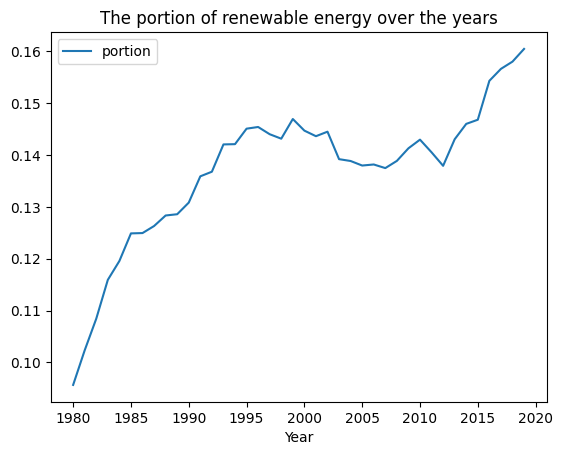

In [8]:
total_df.plot(kind='line', title='The portion of renewable energy over the years', y='portion')

After looking at data for the entire world, we can start asking questions on the individual Country. What are the three countries with the most renewable energy power generation? 
We can filter the dataframe to include only the renewable energy sources in the year of 2019. We also want to drop the rows that has the "World" as a Country name.

In [9]:
highest_renewable = energy.loc[(energy.Year == 2019) & (energy.Energy_type == 'renewables_n_other')][['Country', 'Energy_production']]
highest_renewable = highest_renewable.sort_values("Energy_production", ascending=False)
highest_renewable.drop(highest_renewable[highest_renewable.Country == 'World'].index).head(3)

,Country,Energy_production
54305,China,17.997317
55379,United States,11.595138
54215,Brazil,5.442417


We can see the top three Countries are China, United states, and Brazil

We can also find out how much power generation from renewable energy has increased from 1980 to 2019.

In [10]:
pg = energy.loc[(energy.Country == 'World') & (energy.Energy_type == 'renewables_n_other')]
pg2019 = pg.loc[pg.Year==2019].Energy_production.item()
pg1980 = pg.loc[pg.Year==1980].Energy_production.item()
print("Power generation from renewable power source increased by {:.2f}% from 1980 to 2019".format((pg2019-pg1980)/pg1980*100))

Power generation from renewable power source increased by 239.21% from 1980 to 2019


Another question we can ask is which Country has the highest power generation from nuclear energy in 2019?

In [11]:
highest_nuclear = energy.loc[(energy.Year == 2019) & (energy.Energy_type == 'nuclear')][['Country', 'Energy_production']]
highest_nuclear = highest_nuclear.sort_values("Energy_production", ascending=False)
highest_nuclear.drop(highest_nuclear[highest_nuclear.Country == 'World'].index).head(1)

,Country,Energy_production
55378,United States,8.451852


United States has the highest nuclear energy production.

The general public might not be comfortable with nuclear energy. I believe that after a big nuclear power plant disaster, the growth of nuclear energy will be slowed down. We will prove or disprove this by using Pandas line plot to plot the trend of nuclear energy production from 1980 to 2019

<Axes: xlabel='Year'>

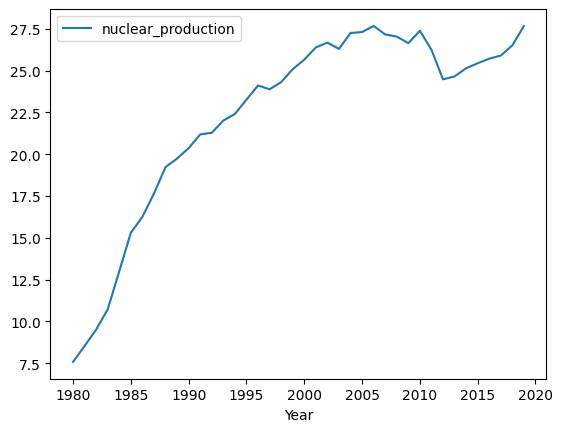

In [12]:
nuclear_production.plot(kind='line')

The most recent nuclear accident was the Fukushima nuclear accident in 2011. As we can see, the nuclear energy production decreased significantly after 2011. We only recovered 2005's nuclear energy production level in 2019. Because of the accident, Germany phased out all nuclear power plants in 2023.

We can also look at how much CO2 emission increased over the last 40 years.

In [13]:
co = energy.loc[(energy.Country == 'World') & (energy.Energy_type == 'all_energy_types')]
co2019 = co.loc[co.Year==2019].CO2_emission.item()
co1980 = co.loc[co.Year==1980].CO2_emission.item()
print("CO2 emission of the entire world increased by {:.2f}% from 1980 to 2019".format((co2019-co1980)/co1980*100))

CO2 emission of the entire world increased by 619.38% from 1980 to 2019


## Project plan after milestone 1
Having the energy generation dataset might be enough to solve the problem we want to ask. By exploring the relationship between the CO2 per capita and GDP per capita, we might find that we reach higher GDP per capita level with lower amount of pollution. However, the increase of renewable energy might not be the only factors contributing to this phenomenon. Therefore, I plan to explore more datasets to build a more solid proof.

## Additional datasets
To assess whether transitioning to sustainable energy is advantageous, it's crucial to examine its most significant benefit compared to traditional energy sources: being more environmentally friendly. The air quality index is a good measure of air pollution. The following dataset comes from [kaggle](https://www.kaggle.com/datasets/threnjen/40-years-of-air-quality-index-from-the-epa-yearly) contains 40 years of yearly AQI index sourced from the Environmental Protection Agency

## Extraction

In [14]:
aqi = pd.read_csv('data/aqi_yearly.csv')
display(aqi.head(3))
len(aqi.columns)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,DeKalb,2021,58,58,0,0,0,0,0,...,42,32,0,0,58,0,0,0,34.289001,-85.970065
1,Alabama,Jefferson,2021,60,33,27,0,0,0,0,...,64,50,1,1,2,0,55,1,33.565278,-86.796389
2,Alaska,Denali,2021,59,59,0,0,0,0,0,...,41,39,0,0,59,0,0,0,63.723200,-148.967600


21

The dataset has 21 columns, we only need to look at a few data, so can extract the data we need and drop other columns by selecting the column names.

In [15]:
aqi_cleaned = aqi[["Year", "Days with AQI", "Good Days"]]
aqi_cleaned.tail(3)

,Year,Days with AQI,Good Days
34183,2020,366,318
34184,2020,366,323
34185,2020,366,336


We will group the dataset by the year, and rename the column names to avoid confusion, then we will get a dataset containing the percentage of good days using AQI as measure of air pollution from 1980 to 2021. We can merge this with our previous dataset containing the different type of energy

In [16]:
aqi_grouped = aqi_cleaned.groupby(['Year']).sum()
aqi_grouped['Percentage of Good Days'] = aqi_grouped['Good Days'] / aqi_grouped['Days with AQI'] * 100
aqi_grouped = aqi_grouped.rename(columns={"Days with AQI": "Days with AQI for all location"})
aqi_grouped = aqi_grouped.rename(columns={"Good Days": "Good Days for all location"})
aqi_grouped.head()

,Days with AQI for all location,Good Days for all location,Percentage of Good Days
Year,,,
1980,143587,77831,54.204768
1981,149784,84275,56.264354
1982,153579,88378,57.545628
1983,160713,92928,57.822329
1984,160542,92070,57.349479


In [17]:
aqi_grouped.loc[2021]["Percentage of Good Days"] - aqi_grouped.loc[1981]["Percentage of Good Days"]

31.04928247329822

We can see that the percentage of good days increased 31.04% over the last 40 years